# File and libraries

In [1]:
import pandas as pd
import numpy as np

filepath=r'dataset/df_msg_scaler_input'

file_tag = "df_msg_feat_eng_input"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


dslabs lodaded


# Data functions

In [3]:
%run "scripts/data_functions.py"


dslabs lodaded
data_functions lodaded


# Load

In [4]:
test_data=True
#test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
#evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # sample
    data=data.sample(frac=0.05, replace=False)
    test=test.sample(frac=0.05, replace=False)
    train=train.sample(frac=0.05, replace=False)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    data=pd.read_csv(f"{filepath}.csv")

    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    test_sample= test.sample(frac=0.05, replace=False)
    train_sample= train.sample(frac=0.05, replace=False)


target='is_unsubscribed'
vars: list[str] = data.columns.to_list()

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, 
#in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39618 entries, 307 to 792255
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   platform                                 39618 non-null  float64
 1   email_provider                           39618 non-null  float64
 2   campaign_type                            39618 non-null  float64
 3   channel_cmp                              39618 non-null  float64
 4   topic                                    39618 non-null  float64
 5   total_count                              39618 non-null  float64
 6   subject_length                           39618 non-null  float64
 7   day_of_year                              39618 non-null  float64
 8   month                                    39618 non-null  float64
 9   days_diff_opened_first_time_at_sent_at   39618 non-null  float64
 10  days_diff_clicked_first_time_at_sent_at  39618 n

In [5]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (27733, 42)
Test shape: (11885, 42)


# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

### recall

Testing threshold: 0.001
Dropping variables: ['days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 34
Evaluation results at threshold 0.001: {'accuracy': [1.0, 0.9979806478754732], 'recall': [1.0, 0.819047619047619], 'precision': [1.0, 0.945054945054945], 'auc': [1.0, 0.9093115854151508], 'f1': [1.0, 0.8775510204081632]}
Evaluation for recall: [1.0, 0.819047619047619]
Testing threshold: 0.002
Dropping variables: ['days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 32
Evaluation results at threshold 0.002: {'accuracy': [0.8462768195204039, 0.9834244846445099], 'recall': [0.6095

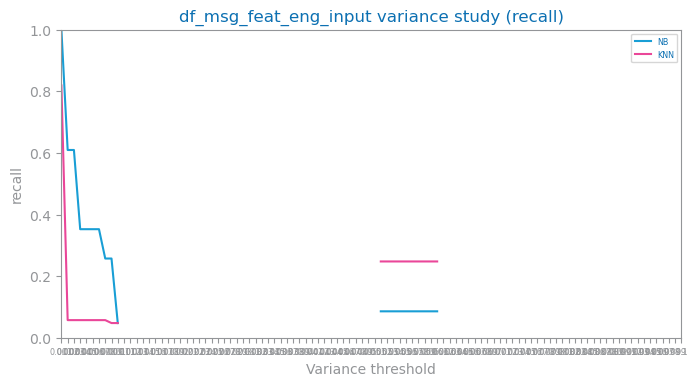

In [15]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.1,
        lag=0.001,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

### accuracy study

Testing threshold: 0.003
Dropping variables: ['email_provider', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 31
Evaluation results at threshold 0.003: {'accuracy': [0.9911653344551956, 0.9904922170803534], 'recall': [0.0, 0.0], 'precision': [0.0, 0.0], 'auc': [0.5, 0.499660441426146], 'f1': [0.0, 0.0]}
Evaluation for accuracy: [0.9911653344551956, 0.9904922170803534]
Testing threshold: 0.006
Dropping variables: ['email_provider', 'days_diff_clicked_first_time_at_sent_at', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features af

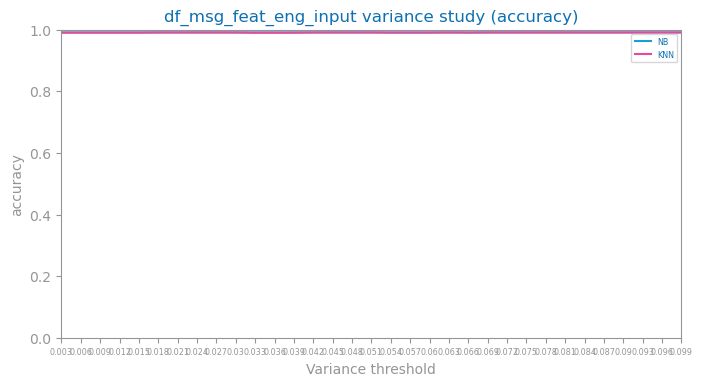

In [14]:
if evaluate==True:

    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.1,
        lag=0.003,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

## Feat 1 strategy Application

In [16]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter

    df_copy=df.copy()
    
    vars2drop: list[str] = select_low_variance_variables(df_copy, max_threshold=0.024, min_features_to_keep=10, target=target)
    
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)

    return df_vars_drop


data_1=apply_strategy_1(data)

data_1.describe()


Variance threshold: 0.024, Remaining features: 24
Variables to drop: ['platform', 'email_provider', 'subject_length', 'days_diff_opened_first_time_at_sent_at', 'days_diff_clicked_first_time_at_sent_at', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'days_diff_first_purchase_date_sent_at', 'is_clicked', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount']
columns to drop: ['platform', 'email_provider', 'subject_length', 'days_diff_opened_first_time_at_sent_at', 'days_diff_clicked_first_time_at_sent_at', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'days_diff_first_purchase_date_sent_at', 'is_clicked', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_emoji', 'subject_with_bonuses', '

,campaign_type,channel_cmp,topic,total_count,day_of_year,month,hour_sin,hour_cos,min_sin,min_cos,...,week_of_month_sin,week_of_month_cos,channel_msg,is_opened,subject_with_deadline,subject_with_saleout,is_weekend,time_of_day,days_diff_started_at_sent_at,is_unsubscribed
count,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,...,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000,39618.000000
mean,0.103602,0.723472,0.799540,0.606285,0.392969,0.499243,0.812564,0.345004,0.486802,0.518231,...,0.595790,0.484881,0.463653,0.138498,0.025014,0.028219,0.050886,0.116917,0.126155,0.037559
std,0.292868,0.326345,0.158736,0.348683,0.268772,0.265517,0.229212,0.212881,0.333543,0.372005,...,0.376573,0.314316,0.498683,0.345426,0.156169,0.165601,0.219768,0.321325,0.332028,0.190129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.846154,0.220689,0.133333,0.500000,0.810825,0.180067,0.161000,0.150575,...,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.846154,0.623055,0.444444,0.500000,0.906701,0.346734,0.500000,0.539770,...,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.846154,0.992449,0.600000,0.500000,0.971134,0.549414,0.798000,0.930965,...,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feat 1 train/test split 

Labels=[0.0, 1.0]


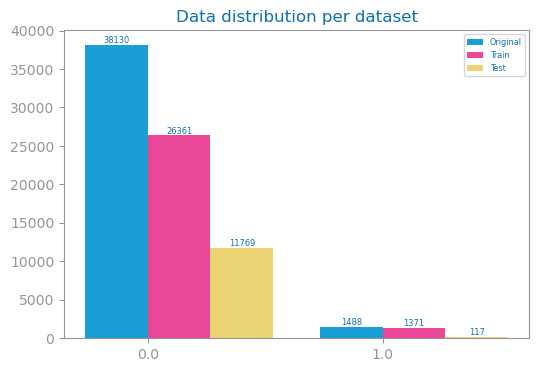

In [17]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # Call the function to split the data
    from numpy import array, ndarray

    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

ZeroDivisionError: float division by zero

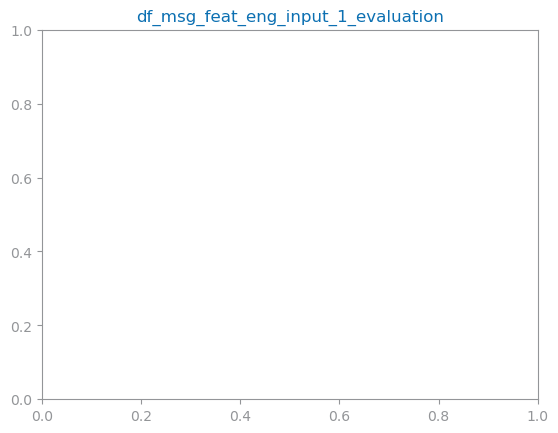

In [18]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_unsubscribed', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


## Feat 2 - Study redundant variables and threshold

In [ ]:
test.columns

Columns in the train dataset: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'day_of_year', 'month', 'days_diff_opened_first_time_at_sent_at', 'days_diff_clicked_first_time_at_sent_at', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_weekend', 'time_of_day', 'days_diff_started_at_sent_at']
Variables considered for correlation: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', '

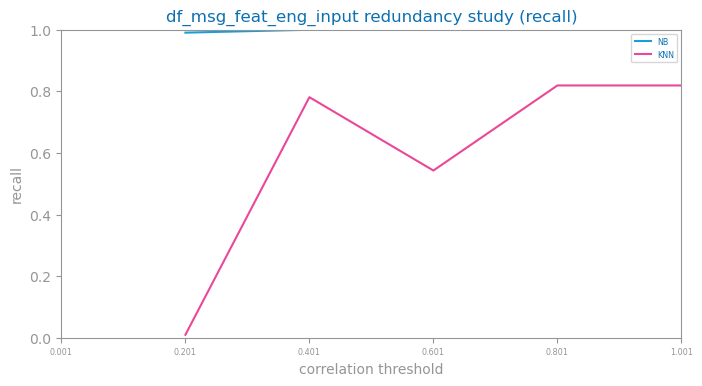

In [19]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

Columns in the train dataset: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'day_of_year', 'month', 'days_diff_opened_first_time_at_sent_at', 'days_diff_clicked_first_time_at_sent_at', 'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at', 'days_diff_purchased_at_sent_at', 'days_diff_first_purchase_date_sent_at', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos', 'channel_msg', 'is_opened', 'is_clicked', 'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_weekend', 'time_of_day', 'days_diff_started_at_sent_at']
Variables considered for correlation: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', '

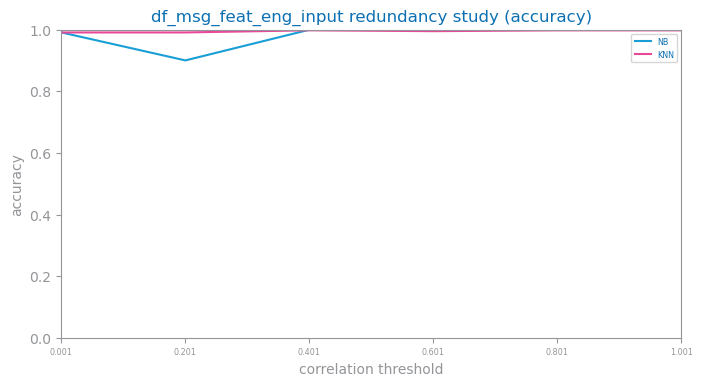

In [20]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

## Feat 2 strategy aplication

In [21]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler

def apply_strategy_2(df):

    df_copy=df.copy()

    vars2drop = select_redundant_variables(df_copy, min_threshold=0.4, target=target)
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)


    return df_vars_drop


data_2=data.copy()

data_2=apply_strategy_2(data_2)


columns to drop: ['channel_cmp', 'topic', 'campaign_type', 'day_of_year', 'month', 'channel_msg', 'subject_with_emoji', 'days_diff_started_at_sent_at', 'total_count', 'hour_cos', 'time_of_day', 'week_of_month_sin', 'week_of_month_cos', 'day_of_week_nr_sin', 'day_of_month_cos', 'day_of_month_sin']
Remaining columns: Index(['platform', 'email_provider', 'subject_length',
       'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'hour_sin', 'min_sin',
       'min_cos', 'day_of_week_nr_cos', 'is_opened', 'is_clicked',
       'is_hard_bounced', 'is_soft_bounced', 'is_complained', 'is_purchased',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout',
       'is_weekend', 'is_unsubscribed'],
      dt

## Feat 2 train/test split 

In [ ]:
if evaluate ==True:
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the function to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Feat 2 evaluate

In [ ]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_unsubscribed', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [ ]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

# Analysis



# save to csv

In [ ]:
if test_data==False:
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"dataset/df_msg_feat_eng_input.csv", index=False)

    print(data_save.columns)

## train test csv

In [ ]:
if test_data==False:
    
    data_save_copy=data_save.copy()
    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_msg_feat_eng_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_msg_feat_eng_test.csv", index=False)
    print(test.columns)